In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [68]:
data = pd.read_csv('dataset_var10.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.555839,-97082.980885,0.137112,0.218883,0.656728,-275.592495,17645.861307,0.011463,B,hard,-345.896288
1,0.567485,14587.203681,0.138518,0.223941,0.684901,-17.229345,-2.613940,0.008561,C,hard,-369.454689
2,0.595810,13899.872856,0.128340,0.170856,0.636858,-583.821274,-2361.750535,-0.011850,C,hard,-104.901215
3,0.586996,0.000000,74.811766,0.181094,0.709770,262.812964,-10433.829341,NaN,A,hard,-40.400567
4,0.579880,-28751.591376,0.156795,0.206972,0.649491,-300.221686,14156.405564,NaN,C,easy,-204.696592
...,...,...,...,...,...,...,...,...,...,...,...
195,0.585190,-12887.264394,0.147242,0.209479,0.659862,-288.814056,-31603.797081,NaN,A,hard,-110.433566
196,0.547829,17168.832786,0.148650,0.176839,0.704464,225.430176,-29956.739978,NaN,B,easy,71.314047
197,0.544149,11508.972637,0.144594,0.210059,0.646347,-405.669954,-37660.988251,NaN,C,normal,-295.096187
198,0.583485,-857.422047,0.128131,0.200710,0.721447,357.324089,25905.700589,NaN,B,hard,-237.999506


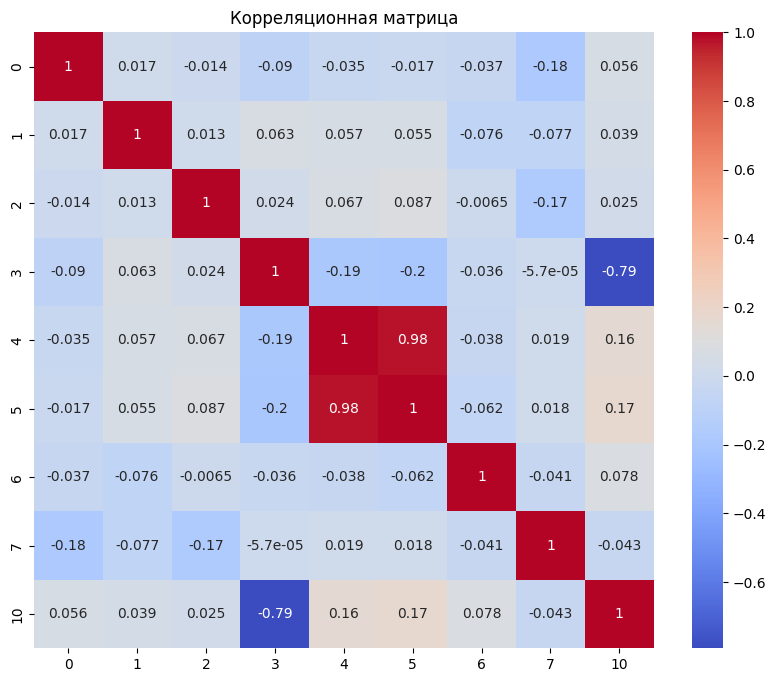

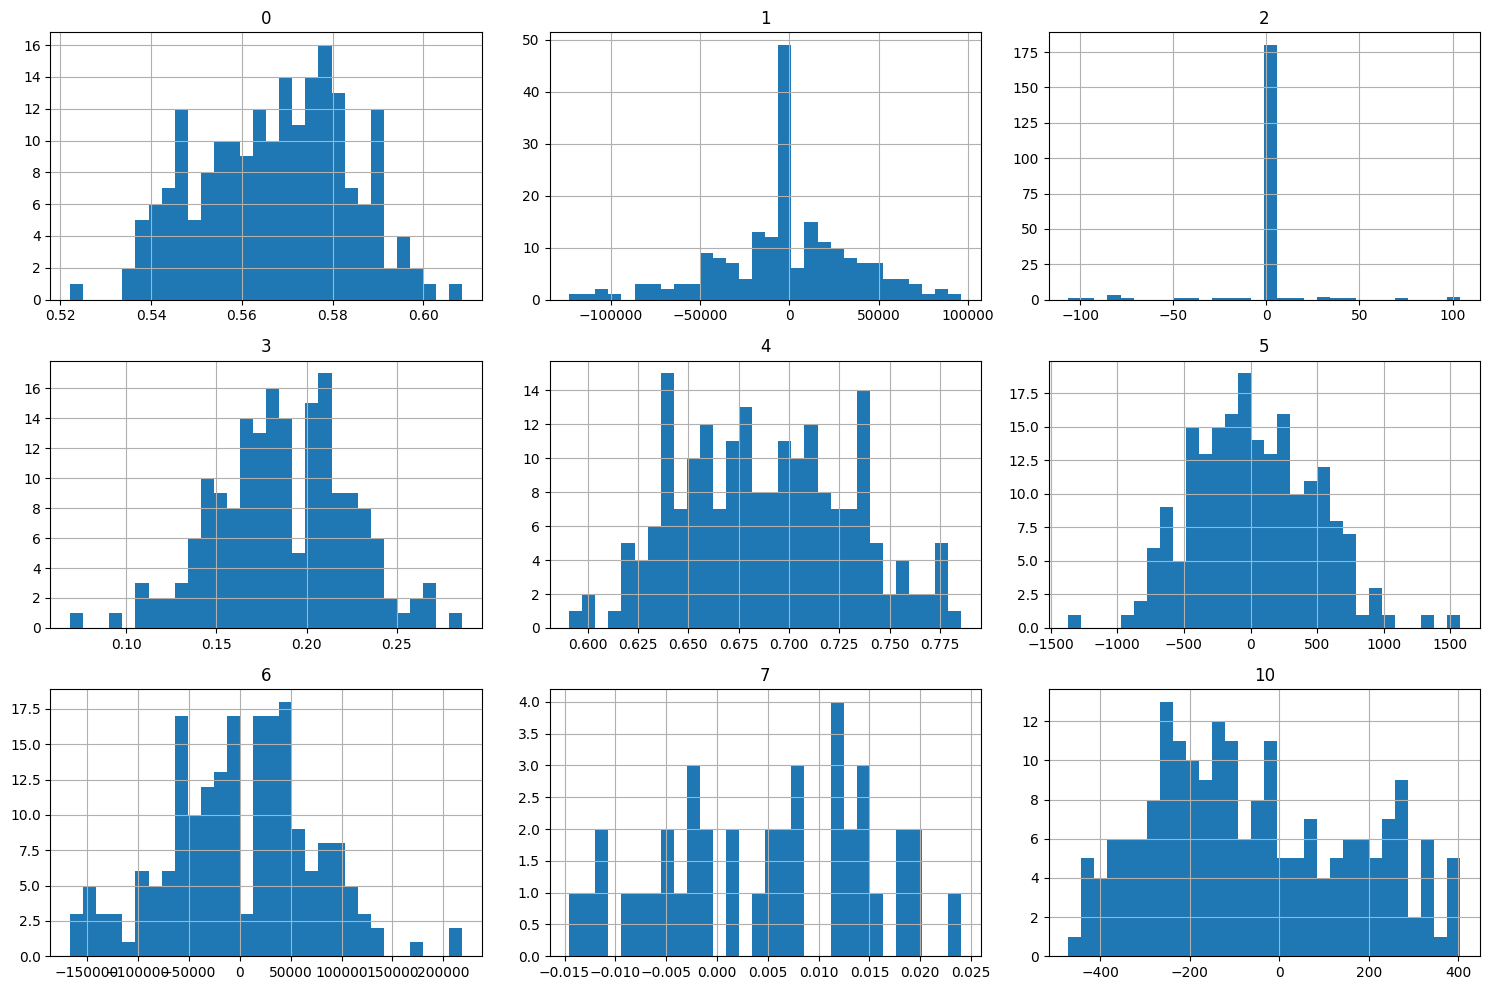

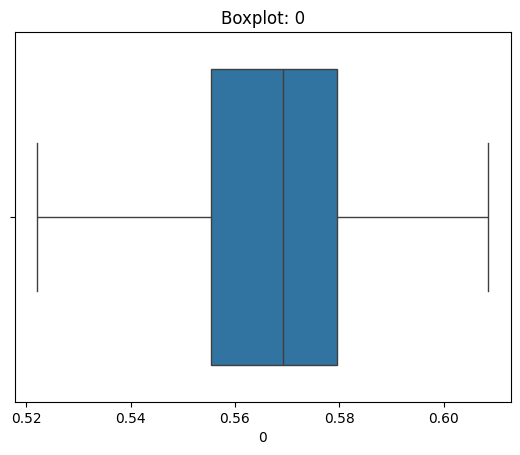

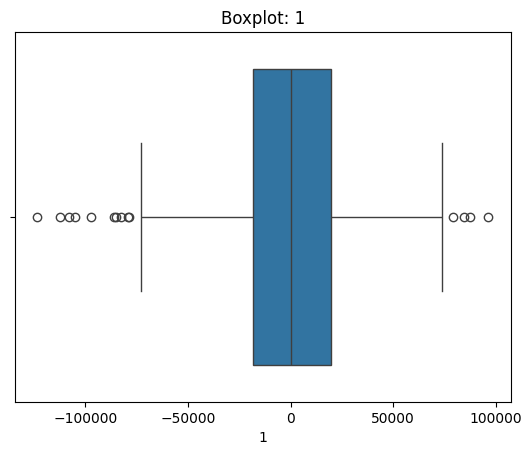

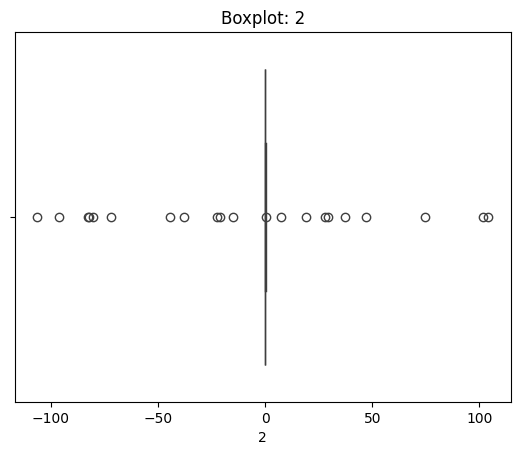

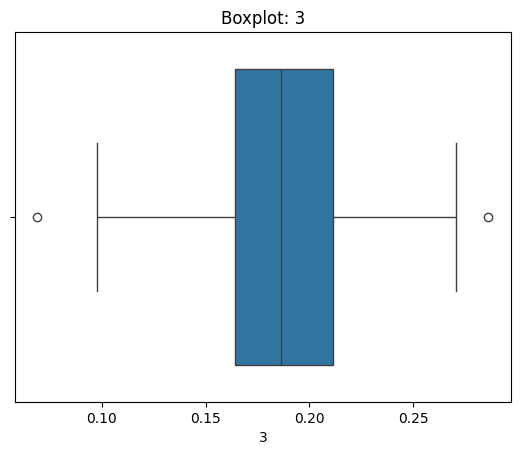

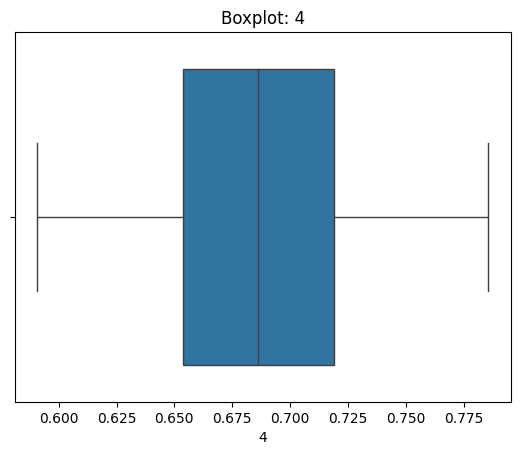

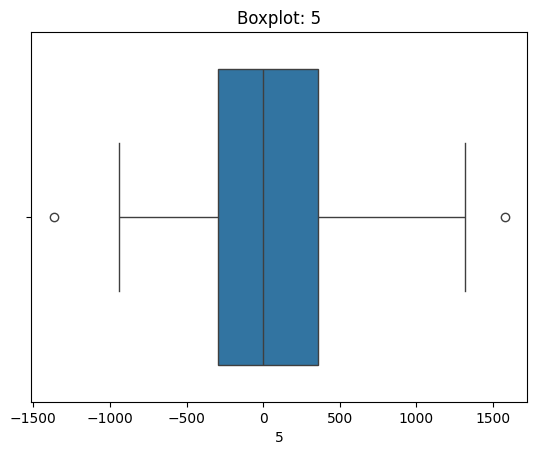

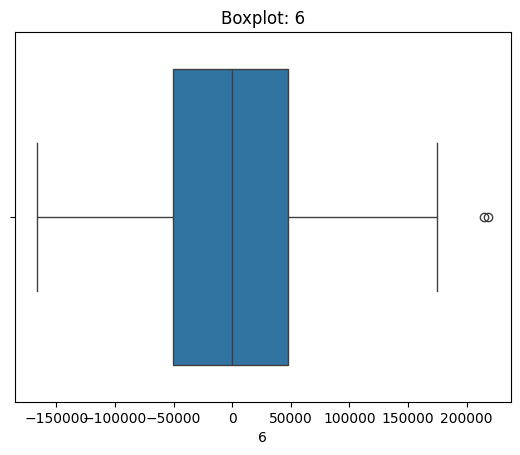

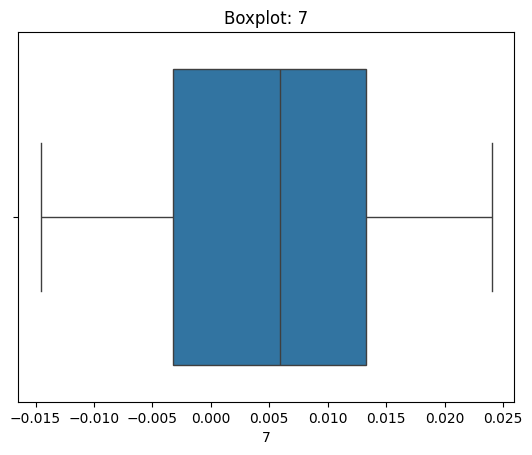

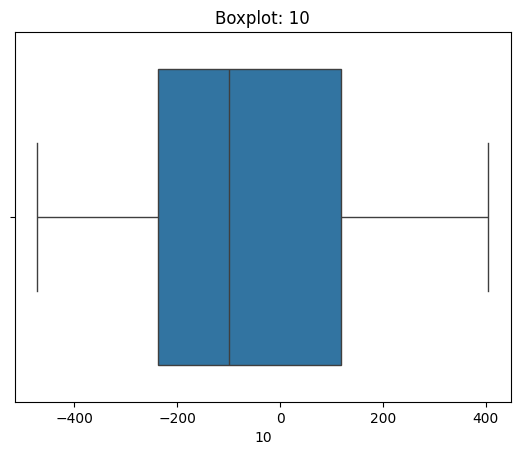

In [69]:
# a. Описание данных
data.describe()

# b. Корреляции между числовыми признаками
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# c. Гистограммы
data.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# d. Ящики (Boxplots) для поиска выбросов
for col in data.select_dtypes(include='number').columns:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

In [70]:
# Проверим пропуски
data.isnull().sum()

# Пример: заполним NaN в числовых признаках медианой
for col in data.select_dtypes(include='number').columns:
    data[col].fillna(data[col].median(), inplace=True)

# Категориальные — модой
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data

C:\Users\vyati\AppData\Local\Temp\ipykernel_22824\2852422061.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\vyati\AppData\Local\Temp\ipykernel_22824\2852422061.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,0,1,2,3,4,5,6,7,8,9,10
0,0.555839,-97082.980885,0.137112,0.218883,0.656728,-275.592495,17645.861307,0.011463,B,hard,-345.896288
1,0.567485,14587.203681,0.138518,0.223941,0.684901,-17.229345,-2.613940,0.008561,C,hard,-369.454689
2,0.595810,13899.872856,0.128340,0.170856,0.636858,-583.821274,-2361.750535,-0.011850,C,hard,-104.901215
3,0.586996,0.000000,74.811766,0.181094,0.709770,262.812964,-10433.829341,0.005911,A,hard,-40.400567
4,0.579880,-28751.591376,0.156795,0.206972,0.649491,-300.221686,14156.405564,0.005911,C,easy,-204.696592
...,...,...,...,...,...,...,...,...,...,...,...
195,0.585190,-12887.264394,0.147242,0.209479,0.659862,-288.814056,-31603.797081,0.005911,A,hard,-110.433566
196,0.547829,17168.832786,0.148650,0.176839,0.704464,225.430176,-29956.739978,0.005911,B,easy,71.314047
197,0.544149,11508.972637,0.144594,0.210059,0.646347,-405.669954,-37660.988251,0.005911,C,normal,-295.096187
198,0.583485,-857.422047,0.128131,0.200710,0.721447,357.324089,25905.700589,0.005911,B,hard,-237.999506


In [71]:
correlations = data.corr(numeric_only=True)[10].abs()
weak_features = correlations[correlations < 0.05].index.tolist()
data.drop(columns=weak_features, inplace=True)

data

,0,3,4,5,6,8,9,10
0,0.555839,0.218883,0.656728,-275.592495,17645.861307,B,hard,-345.896288
1,0.567485,0.223941,0.684901,-17.229345,-2.613940,C,hard,-369.454689
2,0.595810,0.170856,0.636858,-583.821274,-2361.750535,C,hard,-104.901215
3,0.586996,0.181094,0.709770,262.812964,-10433.829341,A,hard,-40.400567
4,0.579880,0.206972,0.649491,-300.221686,14156.405564,C,easy,-204.696592
...,...,...,...,...,...,...,...,...
195,0.585190,0.209479,0.659862,-288.814056,-31603.797081,A,hard,-110.433566
196,0.547829,0.176839,0.704464,225.430176,-29956.739978,B,easy,71.314047
197,0.544149,0.210059,0.646347,-405.669954,-37660.988251,C,normal,-295.096187
198,0.583485,0.200710,0.721447,357.324089,25905.700589,B,hard,-237.999506


In [72]:
data = pd.get_dummies(data, drop_first=True)

data

,0,3,4,5,6,10,8_ABC,8_B,8_C,9_hard,9_normal,9_undefined
0,0.555839,0.218883,0.656728,-275.592495,17645.861307,-345.896288,False,True,False,True,False,False
1,0.567485,0.223941,0.684901,-17.229345,-2.613940,-369.454689,False,False,True,True,False,False
2,0.595810,0.170856,0.636858,-583.821274,-2361.750535,-104.901215,False,False,True,True,False,False
3,0.586996,0.181094,0.709770,262.812964,-10433.829341,-40.400567,False,False,False,True,False,False
4,0.579880,0.206972,0.649491,-300.221686,14156.405564,-204.696592,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.585190,0.209479,0.659862,-288.814056,-31603.797081,-110.433566,False,False,False,True,False,False
196,0.547829,0.176839,0.704464,225.430176,-29956.739978,71.314047,False,True,False,False,False,False
197,0.544149,0.210059,0.646347,-405.669954,-37660.988251,-295.096187,False,False,True,False,True,False
198,0.583485,0.200710,0.721447,357.324089,25905.700589,-237.999506,False,True,False,True,False,False


In [73]:
X = data.drop(columns=10)
y = data[10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_train

,0,3,4,5,6,8_ABC,8_B,8_C,9_hard,9_normal,9_undefined
176,0.591538,0.189807,0.641974,-420.663879,-112373.805667,False,False,False,False,False,False
111,0.539679,0.172318,0.737341,709.706265,41870.236614,False,False,False,False,True,False
114,0.553664,0.186268,0.739410,472.047332,-98239.051693,False,True,False,False,False,False
14,0.553755,0.181858,0.668911,-136.279734,-12240.845863,False,False,True,True,False,False
106,0.608550,0.141536,0.747328,789.730303,-32875.413169,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
120,0.555524,0.228614,0.649580,-353.029752,-92862.974142,False,True,False,False,True,False
112,0.586871,0.229282,0.642211,-473.204495,34813.981746,False,False,True,True,False,False
48,0.569917,0.180780,0.777785,1319.503277,-39746.205333,False,False,True,True,False,False
4,0.579880,0.206972,0.649491,-300.221686,14156.405564,False,False,True,False,False,False


In [ ]:
# модели и их параметры
models_params = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": None
    },
    "Ridge": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0, 100.0]}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}
    },
    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {"n_neighbors": [3, 5, 7, 9, 15, 30]}
    },
    "SVR": {
        "model": SVR(),
        "params": {"C": [1, 10], "kernel": ["linear"]}
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(),
        "params": {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1, 0.2]}
    }
}

results = {}

for name, entry in models_params.items():
    model = entry["model"]
    params = entry["params"]
    
    print(f"\nОбработка модели: {name}")
    
    if params is None:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results[name] = {
            "best_score": score,
            "best_params": "Нет параметров"
        }
        print(f"{name} R2 Score: {score:.4f}")
    else:
        grid = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results[name] = {
            "best_score": score,
            "best_params": grid.best_params_
        }
        print(f"{name} R2 Score: {score:.4f}")
        print(f"Лучшие параметры: {grid.best_params_}")

print("\nРезультатов:")
for name, result in results.items():
    print(f"{name:20s} | R2: {result['best_score']:.4f} | Параметры: {result['best_params']}")


Обработка модели: LinearRegression
LinearRegression R2 Score: 0.5950

Обработка модели: Ridge
Ridge R2 Score: 0.5091
Лучшие параметры: {'alpha': 0.1}

Обработка модели: Lasso
Lasso R2 Score: 0.5704
Лучшие параметры: {'alpha': 1.0}

Обработка модели: DecisionTree
DecisionTree R2 Score: 0.6639
Лучшие параметры: {'max_depth': 3, 'min_samples_split': 10}

Обработка модели: RandomForest
RandomForest R2 Score: 0.6892
Лучшие параметры: {'max_depth': None, 'n_estimators': 50}

Обработка модели: KNN
KNN R2 Score: -0.1071
Лучшие параметры: {'n_neighbors': 30}

Обработка модели: SVR
SVR R2 Score: -1.8704
Лучшие параметры: {'C': 1, 'kernel': 'linear'}

Обработка модели: GradientBoosting
GradientBoosting R2 Score: 0.6913
Лучшие параметры: {'learning_rate': 0.05, 'n_estimators': 100}

Результатов:
LinearRegression     | R2: 0.5950 | Параметры: Нет параметров
Ridge                | R2: 0.5091 | Параметры: {'alpha': 0.1}
Lasso                | R2: 0.5704 | Параметры: {'alpha': 1.0}
DecisionTree      